#Loss Plot





In [10]:
loss=pd.read_csv('SRM_12_2.csv')
loss.head()

,Unnamed: 0,0
0,0,0.679005
1,1,0.663923
2,2,0.638119
3,3,0.592696
4,4,0.512757


In [6]:
loss=pd.read_csv('SRM_loss.csv')
loss.head()

,Unnamed: 0,0
0,0,0.702659
1,1,0.689770
2,2,0.672127
3,3,0.643036
4,4,0.586139


In [0]:
epochs=loss['Unnamed: 0']
los =loss['0']

In [0]:
epochs=loss['Unnamed: 0']
los =loss['0']

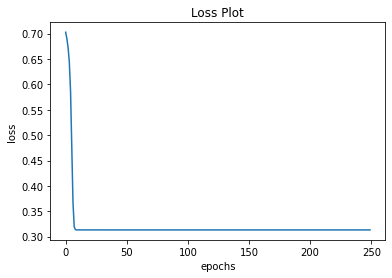

In [9]:
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs,los)

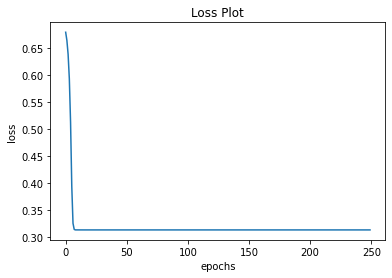

In [12]:
plt.title('Loss Plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs,los)

In [5]:
import pandas as pd
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import numpy as np
import random
from sklearn.model_selection import cross_val_score
!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.svm import NuSVC

     |████████████████████████████████| 64.7MB 49kB/s 


# features read

In [0]:
train_features=pd.read_csv('/content/drive/My Drive/SML _ PROJECT/bhakti_train')
test_features=pd.read_csv('/content/drive/My Drive/SML _ PROJECT/bhakti_test')


In [0]:
train_features

,images,Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,CASIA2/Au/Au_sec_00007.jpg,0.0,0.905887,0.932907,1.021086,1.132062,1.253115,0.981946,0.958899,0.988165,1.067138,1.197780,1.157312,1.042663,0.989522,1.016140,1.109766,1.226057,1.091467,0.964861,0.922734,0.952956,1.168075,1.079531,0.970578,0.898699,0.854254,1.837170,1.665208,1.594689,1.575758,1.534495,1.956321,1.728441,1.628081,1.578349,1.516090,2.080608,1.813664,1.673890,...,1.291013,1.262856,1.296643,1.412849,1.637695,1.363354,1.276559,1.236964,1.269197,1.400856,1.399444,1.291280,1.201886,1.136999,1.182102,0.208694,0.214970,0.221120,0.153924,0.133334,0.210869,0.209555,0.217899,0.172949,0.148919,0.216325,0.217025,0.216771,0.194961,0.173995,0.219547,0.211626,0.226112,0.207992,0.208573,0.200694,0.198082,0.213144,0.197776,0.222826
1,CASIA2/Au/Au_ind_00008.jpg,0.0,1.592663,1.461794,1.393651,1.359804,1.372200,1.264016,1.160673,1.113099,1.121011,1.165802,0.860890,0.826295,0.815273,0.833004,0.901216,0.706703,0.682123,0.713540,0.760552,0.787274,0.630701,0.616988,0.691678,0.780000,0.836844,1.573115,1.585958,1.697477,1.815376,1.894158,1.642695,1.614087,1.648987,1.702566,1.746371,1.758868,1.752788,1.730263,...,1.293897,1.207649,1.183887,1.259184,1.365509,0.954746,0.908553,0.918247,0.977954,1.056550,0.780641,0.717444,0.739619,0.800714,0.909588,0.366684,0.448542,0.456054,0.408641,0.363264,0.344324,0.426649,0.476021,0.453205,0.398983,0.354086,0.429745,0.462438,0.455109,0.414831,0.304097,0.330687,0.358101,0.341270,0.333698,0.286697,0.306212,0.329289,0.313469,0.281863
2,CASIA2/Au/Au_ani_10163.jpg,0.0,2.491884,2.533769,2.580924,2.604121,2.599417,2.545025,2.566067,2.602487,2.619277,2.628328,2.653017,2.651735,2.668029,2.670368,2.648604,2.790495,2.754805,2.740755,2.737879,2.727721,2.943602,2.911637,2.874883,2.849691,2.856841,1.555126,1.594964,1.638849,1.710284,1.787904,1.440847,1.490231,1.547007,1.619745,1.675405,1.409010,1.425724,1.470383,...,4.145979,4.146913,4.186978,4.220872,4.268958,4.233969,4.204856,4.223344,4.238219,4.275111,4.394281,4.345842,4.347609,4.327672,4.329289,0.115136,0.116414,0.109222,0.114018,0.100433,0.136906,0.135616,0.110894,0.122109,0.110321,0.132728,0.143876,0.122018,0.110399,0.119840,0.110430,0.134731,0.136359,0.136853,0.146670,0.100629,0.128333,0.142136,0.137953,0.147088
3,CASIA2/Au/Au_art_00024.jpg,0.0,2.770648,2.831967,2.944292,3.110212,3.317220,2.823648,2.882055,2.983769,3.151807,3.356131,2.855310,2.946810,3.065087,3.204294,3.365145,2.793804,2.905758,2.997769,3.073122,3.149429,2.677331,2.709075,2.737180,2.762030,2.816684,1.636849,1.567699,1.595750,1.688331,1.901547,1.565180,1.410097,1.466148,1.663428,1.952441,1.407224,1.257109,1.260218,...,4.526288,4.752910,5.015817,5.302907,5.546901,4.466388,4.676002,4.909005,5.128639,5.332831,4.316904,4.434801,4.563911,4.703127,4.901591,0.108051,0.173502,0.202762,0.193008,0.175151,0.100627,0.138641,0.165225,0.162574,0.146250,0.100056,0.135540,0.181052,0.212537,0.224589,0.106608,0.150967,0.190690,0.229050,0.263367,0.148116,0.168246,0.244537,0.300853,0.322468
4,CASIA2/Au/Au_pla_00004.jpg,0.0,1.532823,1.426277,1.397576,1.483037,1.605058,1.610225,1.552632,1.529030,1.561579,1.628019,1.623844,1.578526,1.553087,1.526202,1.519804,1.530860,1.457552,1.453337,1.466802,1.456891,1.419335,1.314430,1.363068,1.486733,1.555355,2.227067,2.189849,2.070029,1.926985,1.837784,2.206849,2.205924,2.043806,1.854764,1.757993,2.158880,2.182115,1.964929,...,2.352827,2.239930,2.278402,2.358895,2.403075,2.263548,2.153032,2.161987,2.254518,2.347694,2.179590,2.048341,2.042666,2.175275,2.343694,0.122618,0.100256,0.098433,0.129236,0.139525,0.135838,0.076264,0.064773,0.141394,0.164871,0.195905,0.139561,0.093255,0.140773,0.173935,0.245144,0.237467,0.197880,0.202863,0.197019,0.262504,0.252578,0.206257,0.182404,0.157046
...,...,...,...,...,...

In [0]:
Y_train=train_features['Label']
X_train=train_features.drop(['Label','images'],axis=1)
Y_test=test_features['Label']#for checking
X_test=test_features.drop(['Label','images'],axis=1)

# Feature Analysis on 8 Patch Model

In [0]:
svm=SVC(gamma=0.0001,C=1000)
xg=xgb.XGBClassifier(booster='gbtree',eta=0.1)
lg=LGBMClassifier(objective='binary', boosting='gbdt',learning_rate = 0.1)
cb=CatBoostClassifier(iterations=935,learning_rate=0.1)

In [0]:
def cv_checker(classifier , train , label):
  results=[]
  Xt = train
  y = label
  skf = StratifiedKFold(n_splits=5)
  acc=cross_val_score(classifier, Xt, y, cv=skf,scoring='accuracy')
  print(acc)
  results.append(acc)
  print(acc.mean())
  print(acc.std())
  return results

In [48]:
r4=cv_checker(lf,X_train,Y_train)

Streaming output truncated to the last 5000 lines.
614:	learn: 0.0846339	total: 1m 1s	remaining: 32.1s
615:	learn: 0.0843266	total: 1m 1s	remaining: 32s
616:	learn: 0.0841381	total: 1m 1s	remaining: 31.9s
617:	learn: 0.0839804	total: 1m 1s	remaining: 31.8s
618:	learn: 0.0838562	total: 1m 2s	remaining: 31.7s
619:	learn: 0.0836467	total: 1m 2s	remaining: 31.6s
620:	learn: 0.0834845	total: 1m 2s	remaining: 31.5s
621:	learn: 0.0833239	total: 1m 2s	remaining: 31.4s
622:	learn: 0.0831063	total: 1m 2s	remaining: 31.3s
623:	learn: 0.0828995	total: 1m 2s	remaining: 31.2s
624:	learn: 0.0827101	total: 1m 2s	remaining: 31.1s
625:	learn: 0.0825839	total: 1m 2s	remaining: 31s
626:	learn: 0.0823140	total: 1m 2s	remaining: 30.9s
627:	learn: 0.0821119	total: 1m 2s	remaining: 30.8s
628:	learn: 0.0818291	total: 1m 3s	remaining: 30.7s
629:	learn: 0.0816918	total: 1m 3s	remaining: 30.6s
630:	learn: 0.0815199	total: 1m 3s	remaining: 30.5s
631:	learn: 0.0812992	total: 1m 3s	remaining: 30.4s
632:	learn: 0.081

In [46]:
r3=cv_checker(cb,X_train,Y_train)

0:	learn: 0.6264585	total: 106ms	remaining: 1m 38s
1:	learn: 0.5738305	total: 211ms	remaining: 1m 38s
2:	learn: 0.5317266	total: 316ms	remaining: 1m 38s
3:	learn: 0.4963675	total: 423ms	remaining: 1m 38s
4:	learn: 0.4664892	total: 528ms	remaining: 1m 38s
5:	learn: 0.4468447	total: 638ms	remaining: 1m 38s
6:	learn: 0.4278208	total: 744ms	remaining: 1m 38s
7:	learn: 0.4130118	total: 858ms	remaining: 1m 39s
8:	learn: 0.4005592	total: 972ms	remaining: 1m 40s
9:	learn: 0.3901067	total: 1.08s	remaining: 1m 39s
10:	learn: 0.3823638	total: 1.19s	remaining: 1m 39s
11:	learn: 0.3751460	total: 1.3s	remaining: 1m 40s
12:	learn: 0.3694335	total: 1.41s	remaining: 1m 40s
13:	learn: 0.3642623	total: 1.52s	remaining: 1m 40s
14:	learn: 0.3601559	total: 1.62s	remaining: 1m 39s
15:	learn: 0.3557236	total: 1.73s	remaining: 1m 39s
16:	learn: 0.3519939	total: 1.84s	remaining: 1m 39s
17:	learn: 0.3486599	total: 1.96s	remaining: 1m 39s
18:	learn: 0.3458778	total: 2.07s	remaining: 1m 39s
19:	learn: 0.3436771	to

In [33]:
r2=cv_checker(lg,X_train,Y_train)

[0.71997846 0.75175013 0.89606893 0.89709052 0.91971983]
0.8369215735427925
0.08355133521681929


In [32]:
r1=cv_checker(xg,X_train,Y_train)

[0.69682283 0.74367259 0.88691438 0.8987069  0.91056034]
0.827335408426643
0.08899767704507698


In [31]:
r=cv_checker(svm,X_train,Y_train)

[0.73559505 0.75498115 0.92945611 0.91918103 0.93642241]
0.8551271516907135
0.09005971286077423


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
results = []
names = []
scoring = 'accuracy'
X= np.array(data)
Y=np.array(label)
for name, model in models:
	skf = StratifiedKFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=skf, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison


catboost

In [44]:
clf = CatBoostClassifier( iterations=933,learning_rate=0.1,custom_loss=['AUC', 'Accuracy'])

clf.fit(X_train,Y_train,verbose=True,
          eval_set=(X_test, Y_test),
        plot=True )

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6346238	test: 0.6179699	best: 0.6179699 (0)	total: 119ms	remaining: 2m 58s
1:	learn: 0.5904471	test: 0.5615483	best: 0.5615483 (1)	total: 235ms	remaining: 2m 56s
2:	learn: 0.5517470	test: 0.5104747	best: 0.5104747 (2)	total: 353ms	remaining: 2m 56s
3:	learn: 0.5214328	test: 0.4719977	best: 0.4719977 (3)	total: 468ms	remaining: 2m 55s
4:	learn: 0.4993505	test: 0.4423094	best: 0.4423094 (4)	total: 590ms	remaining: 2m 56s
5:	learn: 0.4810043	test: 0.4184841	best: 0.4184841 (5)	total: 705ms	remaining: 2m 55s
6:	learn: 0.4660084	test: 0.3995253	best: 0.3995253 (6)	total: 827ms	remaining: 2m 56s
7:	learn: 0.4538706	test: 0.3835792	best: 0.3835792 (7)	total: 951ms	remaining: 2m 57s
8:	learn: 0.4433469	test: 0.3703719	best: 0.3703719 (8)	total: 1.07s	remaining: 2m 56s
9:	learn: 0.4345048	test: 0.3585526	best: 0.3585526 (9)	total: 1.18s	remaining: 2m 56s
10:	learn: 0.4275283	test: 0.3481507	best: 0.3481507 (10)	total: 1.3s	remaining: 2m 55s
11:	learn: 0.4217349	test: 0.3397032	best:

stacking classifier

In [0]:

estimators = [
    ('svm',SVC(gamma=0.0001,C=1000)),
    # ('xgb_t',xgb.XGBClassifier(booster='gbtree',eta=0.1)),
    # ('lg' , LGBMClassifier(objective='binary', boosting='gbdt',learning_rate = 0.1)),
    ('cb',CatBoostClassifier(iterations=935,learning_rate=0.1)) ]

lf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=5)
# lf.fit()

In [0]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import model_selection
from sklearn.svm import SVC


In [23]:
results=np.array([0.74259558 ,0.76036618, 0.9095315,  0.90786638, 0.921875  ])
results.mean()

0.8484469280000001

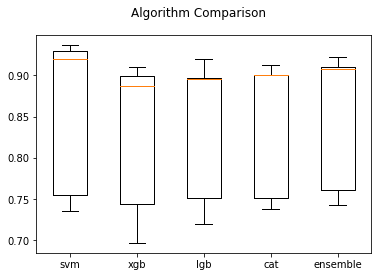

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(l1)
ax.set_xticklabels(name)
plt.show()

In [0]:
l1=[]

In [0]:
l1.append(r4)

In [0]:
name=['svm','xgb','lgb','cat','ensemble','cat+svm']

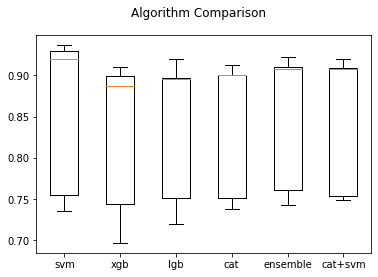

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(l1)
ax.set_xticklabels(name)
plt.show()

In [0]:
ma=[0.7462131287950532, 0.6995621181735465, 0.7740093982693628, 0.7670059583495813, 0.7927546399457783, 0.7775640981003844, 0.818070430152452, 0.7979253128887899, 0.8316444766308285, 0.8199020945908307, 0.8414463330733664, 0.8381072085120606 ,0.8442463743895419 ,0.8551271516907135]
c = ['0.001', '0.01', '0.1', '1', '10', '100', '1000']
gamma = [0.001,0.0001]

<BarContainer object of 7 artists>

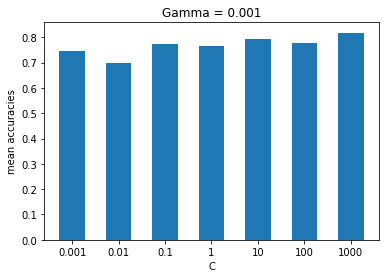

In [20]:
plt.title('Gamma = 0.001')
plt.ylabel('mean accuracies')
plt.xlabel('C')
plt.bar(c,ma[:7],width=0.55)

In [0]:
import matplotlib.pyplot as plt


<BarContainer object of 7 artists>

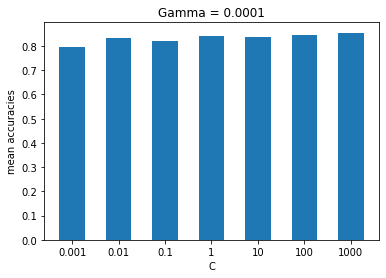

In [19]:
plt.title('Gamma = 0.0001')
plt.ylabel('mean accuracies')
plt.xlabel('C')
# plt.bar(c,ma[:7])
plt.bar(c,ma[7:14], width = 0.55)

# Feature ANALYSIS of 2 patch model

In [0]:
train_features=pd.read_csv('/content/drive/My Drive/SML _ PROJECT/train_patch2_features.csv')
test_features=pd.read_csv('/content/drive/My Drive/SML _ PROJECT/test_patch2_features.csv')
Y_train=train_features['labels']
X_train=train_features.drop(['labels','image_names'],axis=1)
Y_test=test_features['labels']#for checking
X_test=test_features.drop(['labels','image_names'],axis=1)

In [6]:
train_features.head()

,image_names,labels,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400
0,CASIA2/Au/Au_sec_00007.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008923,0.014714,0.015845,0.038762,0.032093,0.011099,0.023348,0.022495,0.012942,0.012131,0.014636,0.006954,0.022408,...,0.001854,0.000000,0.001013,0.003309,0.001571,0.008125,0.003618,0.003395,0.000000,0.000455,0.015801,0.000065,0.002411,0.003514,0.006969,0.142916,0.147518,0.140304,0.131004,0.126456,0.148744,0.175522,0.175499,0.148779,0.158357,0.187901,0.163755,0.168259,0.160267,0.151334,0.146268,0.149390,0.147044,0.133166,0.116512,0.138319,0.129851,0.145181,0.160455,0.151655
1,CASIA2/Au/Au_ind_00008.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018105,0.021384,0.014193,0.014376,0.011959,0.025891,0.029841,0.009748,0.014729,0.016410,0.018119,0.018420,0.019110,...,0.003350,0.005200,0.015389,0.006432,0.000023,0.009482,0.007839,0.011511,0.002203,0.001115,0.007560,0.010943,0.006927,0.001754,0.006497,0.109538,0.117205,0.126229,0.113630,0.127283,0.126374,0.127552,0.127493,0.117472,0.124400,0.110504,0.120971,0.132075,0.129651,0.137464,0.101443,0.111009,0.120204,0.126992,0.141675,0.096585,0.100491,0.111207,0.108386,0.137185
2,CASIA2/Au/Au_ani_10163.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033889,0.032669,0.029760,0.032279,0.030245,0.023939,0.025678,0.021176,0.028860,0.031737,0.031565,0.025134,0.030523,...,0.018816,0.019772,0.023692,0.020388,0.020145,0.018491,0.022308,0.021992,0.017870,0.021675,0.022350,0.024852,0.020998,0.015999,0.019261,0.080152,0.076917,0.079147,0.086059,0.097481,0.083040,0.076600,0.080513,0.086168,0.100180,0.084756,0.081296,0.090806,0.096273,0.098734,0.089367,0.084983,0.088103,0.100282,0.098500,0.102272,0.101117,0.097220,0.104809,0.108758
3,CASIA2/Au/Au_art_00024.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033881,0.020676,0.017806,0.019777,0.027322,0.017740,0.019500,0.026342,0.029200,0.031431,0.021736,0.034775,0.033307,...,0.017186,0.016321,0.017090,0.012984,0.017774,0.013702,0.021389,0.028545,0.024949,0.022492,0.019779,0.016352,0.021652,0.010087,0.013827,0.111820,0.114339,0.111077,0.100047,0.113099,0.103972,0.101850,0.090777,0.092519,0.091086,0.093621,0.097515,0.093032,0.085271,0.089927,0.088943,0.083384,0.083085,0.084897,0.084717,0.085574,0.084687,0.091397,0.088163,0.089887
4,CASIA2/Au/Au_pla_00004.jpg,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038499,0.037874,0.038199,0.039329,0.032435,0.036178,0.037666,0.028230,0.033015,0.023225,0.027864,0.037082,0.032326,...,0.027338,0.027442,0.028151,0.024527,0.021780,0.027356,0.028087,0.026252,0.019637,0.022944,0.024763,0.024328,0.028091,0.026119,0.020958,0.077983,0.065830,0.070656,0.070090,0.080653,0.077847,0.067063,0.068957,0.072520,0.078578,0.074979,0.073834,0.081526,0.087965,0.079879,0.080234,0.082616,0.095914,0.094171,0.101080,0.088455,0.086713,0.088919,0.103955,0.102603


In [0]:
svm=SVC(gamma=0.0001,C=1000)
xg=xgb.XGBClassifier(booster='gbtree',eta=0.1)
lg=LGBMClassifier(objective='binary', boosting='gbdt',learning_rate = 0.1)
cb=CatBoostClassifier(iterations=935,learning_rate=0.1)

In [0]:
estimators = [
    ('svm',SVC(gamma=0.0001,C=1000)),
    ('xgb_t',xgb.XGBClassifier(booster='gbtree',eta=0.1)),
    ('lg' , LGBMClassifier(objective='binary', boosting='gbdt',learning_rate = 0.1)),
    ('cb',CatBoostClassifier(iterations=935,learning_rate=0.1)) ]

ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=2)
# lf.fit()

In [0]:
estimators = [
    ('svm',SVC(gamma=0.0001,C=1000)),
    # ('xgb_t',xgb.XGBClassifier(booster='gbtree',eta=0.1)),
    # ('lg' , LGBMClassifier(objective='binary', boosting='gbdt',learning_rate = 0.1)),
    ('cb',CatBoostClassifier(iterations=935,learning_rate=0.1)) ]

ensemble2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=5)
# lf.fit()

In [0]:
results=[]

In [19]:
r1=cv_checker(svm,X_train,Y_train)
results.append(r1)
r2=cv_checker(xg,X_train,Y_train)
results.append(r2)
r3=cv_checker(lg,X_train,Y_train)
results.append(r3)
r4=cv_checker(cb,X_train,Y_train)
results.append(r4)
r5=cv_checker(ensemble,X_train,Y_train)
results.append(r5)
r6=cv_checker(ensemble2,X_train,Y_train)
results.append(r6)

Streaming output truncated to the last 5000 lines.
614:	learn: 0.2857050	total: 58.3s	remaining: 30.4s
615:	learn: 0.2853861	total: 58.4s	remaining: 30.3s
616:	learn: 0.2852559	total: 58.5s	remaining: 30.2s
617:	learn: 0.2847171	total: 58.6s	remaining: 30.1s
618:	learn: 0.2844056	total: 58.7s	remaining: 30s
619:	learn: 0.2840439	total: 58.8s	remaining: 29.9s
620:	learn: 0.2836356	total: 58.9s	remaining: 29.8s
621:	learn: 0.2833761	total: 59s	remaining: 29.7s
622:	learn: 0.2830764	total: 59.1s	remaining: 29.6s
623:	learn: 0.2828388	total: 59.2s	remaining: 29.5s
624:	learn: 0.2824903	total: 59.3s	remaining: 29.4s
625:	learn: 0.2822476	total: 59.4s	remaining: 29.3s
626:	learn: 0.2817184	total: 59.5s	remaining: 29.2s
627:	learn: 0.2813311	total: 59.6s	remaining: 29.1s
628:	learn: 0.2810286	total: 59.7s	remaining: 29s
629:	learn: 0.2806135	total: 59.7s	remaining: 28.9s
630:	learn: 0.2802299	total: 59.9s	remaining: 28.8s
631:	learn: 0.2796417	total: 60s	remaining: 28.7s
632:	learn: 0.2792985

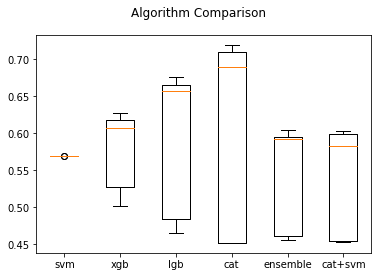

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(r)
ax.set_xticklabels(name)
plt.show()

In [22]:
results

[[array([0.56919763, 0.56919763, 0.56919763, 0.56950431, 0.56896552])],
 [array([0.50188476, 0.5277329 , 0.62735595, 0.61799569, 0.60668103])],
 [array([0.46580506, 0.48357566, 0.66612816, 0.67618534, 0.65732759])],
 [array([0.45180398, 0.45180398, 0.71028541, 0.71928879, 0.68965517])],
 [array([0.46095854, 0.45557351, 0.59558428, 0.59267241, 0.60506466])],
 [array([0.455035  , 0.45341949, 0.59881529, 0.58297414, 0.60290948])]]

In [32]:
results[1][0]

array([0.50188476, 0.5277329 , 0.62735595, 0.61799569, 0.60668103])

In [0]:
r=[]
for i in range(6):
  r.append(results[i][0])

#feature analysis of mask gen model

In [0]:
train_features=pd.read_csv('/content/drive/My Drive/SML _ PROJECT/features.csv')
# test_features=pd.read_csv('/content/drive/My Drive/SML _ PROJECT/test_patch2_features.csv')
Y_train=train_features['labels']
X_train=train_features.drop(['labels','image_names'],axis=1)
# Y_test=test_features['labels']#for checking
# X_test=test_features.drop(['labels','image_names'],axis=1)

In [0]:
results=[]

In [39]:
r1=cv_checker(svm,X_train,Y_train)
results.append(r1)
r2=cv_checker(xg,X_train,Y_train)
results.append(r2)
r3=cv_checker(lg,X_train,Y_train)
results.append(r3)
r4=cv_checker(cb,X_train,Y_train)
results.append(r4)
r5=cv_checker(ensemble,X_train,Y_train)
results.append(r5)
r6=cv_checker(ensemble2,X_train,Y_train)
results.append(r6)

Streaming output truncated to the last 5000 lines.
614:	learn: 0.3822720	total: 47.8s	remaining: 24.9s
615:	learn: 0.3817231	total: 47.8s	remaining: 24.8s
616:	learn: 0.3813947	total: 47.9s	remaining: 24.7s
617:	learn: 0.3812076	total: 48s	remaining: 24.6s
618:	learn: 0.3807494	total: 48.1s	remaining: 24.5s
619:	learn: 0.3804503	total: 48.2s	remaining: 24.5s
620:	learn: 0.3801750	total: 48.2s	remaining: 24.4s
621:	learn: 0.3799936	total: 48.3s	remaining: 24.3s
622:	learn: 0.3797274	total: 48.4s	remaining: 24.2s
623:	learn: 0.3793280	total: 48.5s	remaining: 24.2s
624:	learn: 0.3791319	total: 48.6s	remaining: 24.1s
625:	learn: 0.3788152	total: 48.6s	remaining: 24s
626:	learn: 0.3784579	total: 48.7s	remaining: 23.9s
627:	learn: 0.3782273	total: 48.8s	remaining: 23.8s
628:	learn: 0.3781783	total: 48.9s	remaining: 23.8s
629:	learn: 0.3778687	total: 48.9s	remaining: 23.7s
630:	learn: 0.3775038	total: 49s	remaining: 23.6s
631:	learn: 0.3773084	total: 49.1s	remaining: 23.5s
632:	learn: 0.37695

In [40]:
results

[[array([0.50242326, 0.53581045, 0.57081314, 0.57327586, 0.57165948])],
 [array([0.49542272, 0.51750135, 0.61281637, 0.59698276, 0.60290948])],
 [array([0.44211093, 0.45665051, 0.64566505, 0.64116379, 0.63146552])],
 [array([0.44264943, 0.4372644 , 0.65643511, 0.64978448, 0.65032328])],
 [array([0.46418955, 0.44803446, 0.56865913, 0.56842672, 0.56896552])],
 [array([0.46203554, 0.43887991, 0.56919763, 0.56950431, 0.56896552])]]

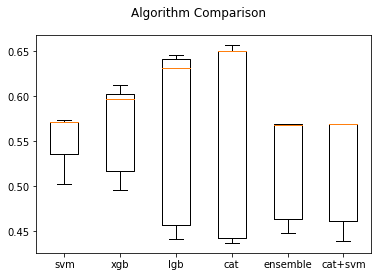

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(r)
ax.set_xticklabels(name)
plt.show()